<a href="https://colab.research.google.com/github/steviaputri/Titanic-Survival-Analysis/blob/main/titanic_survival_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Project
## 🚢 Titanic Survival Analysis
This project was created as a learning tool in understanding and applying fundamental steps in data analysis, especially at the data cleaning and exploratory data analysis (EDA) stages. The main focus is to equip basic skills in handling real-world datasets, from recognizing problems contained in the data, cleaning and preparing data, to digging for important information and patterns through simple but informative visualization techniques.


## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Load Dataset

In [3]:
# adjust the path accordingly
!gdown --id 1401icFoxVf1LFfFmSqmHNoAo3aOgaGWt -O titanic.xlsx

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1401icFoxVf1LFfFmSqmHNoAo3aOgaGWt
To: /content/titanic.xlsx
100% 34.1k/34.1k [00:00<00:00, 42.0MB/s]


In [4]:
excel_file = "titanic.xlsx"

df = pd.read_excel(excel_file, sheet_name="titanic3")

# Preliminary

In [5]:
# Showing top 5 rows of the data
df.head()

,survived,name,sex,age
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000
1,1,"Allison, Master. Hudson Trevor",male,0.9167
2,0,"Allison, Miss. Helen Loraine",female,2.0000
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


In [6]:
df.tail()

,survived,name,sex,age
495,1,"Mallet, Mrs. Albert (Antoinette Magnin)",female,24.0
496,0,"Mangiavacchi, Mr. Serafino Emilio",male,NaN
497,0,"Matthews, Mr. William John",male,30.0
498,0,"Maybery, Mr. Frank Hubert",male,40.0
499,0,"McCrae, Mr. Arthur Gordon",male,32.0


In [7]:
# sample 5 rows of the data
# the results change everytime the code is executed (random sample)
df.sample(5)

,survived,name,sex,age
494,0,"Mallet, Mr. Albert",male,31.0
224,0,"Partner, Mr. Austen",male,45.5
174,0,"Kent, Mr. Edward Austin",male,58.0
105,0,"Evans, Miss. Edith Corse",female,36.0
127,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  500 non-null    int64  
 1   name      500 non-null    object 
 2   sex       500 non-null    object 
 3   age       451 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


Observasi:
1. Data berisi 4 kolom dan 500 baris.
2. Dapat dilihat jika hanya kolom age yang memiliki missing value. Kolom akan ditangani pada bagian berikutnya.
3. Pada kolom survived merupakan biner (0,1)
4. Kolom sex sepertinya hanya berisi dua nilai berbeda (male atau female). Namun, akan diobservasi lebih lanjut.
5. Tampaknya semua tipedata sudah sesuai sesuai dengan nama kolomnya.

# Statistical Summary

In [9]:
df.columns

Index(['survived', 'name', 'sex', 'age'], dtype='object')

In [10]:
df.describe(include='all')

,survived,name,sex,age
count,500.000000,500,500,451.000000
unique,NaN,499,2,NaN
top,NaN,"Eustis, Miss. Elizabeth Mussey",male,NaN
freq,NaN,2,288,NaN
mean,0.540000,NaN,NaN,35.917775
std,0.498897,NaN,NaN,14.766454
min,0.000000,NaN,NaN,0.666700
25%,0.000000,NaN,NaN,24.000000
50%,1.000000,NaN,NaN,35.000000
75%,1.000000,NaN,NaN,47.000000


In [11]:
# group column names based on type
# it will make our life easier onwards
categoricals = ['name','sex']

numericals = ['survived','age']

## Categorikal

In [12]:
# Syntax describe method on categorical data
df[categoricals].describe()

,name,sex
count,500,500
unique,499,2
top,"Eustis, Miss. Elizabeth Mussey",male
freq,2,288


In [13]:
# syntax describe method on categorical data
df[categoricals].describe()

,name,sex
count,500,500
unique,499,2
top,"Eustis, Miss. Elizabeth Mussey",male
freq,2,288


Observations:

- name have 499 unique value, sex have 2 unique value (male & female).
- "Eustis, Miss. Elizabeth Mussey" is the most of name (2 rows), and "male" is the most of gender/sex (288 rows)

In [14]:
# showing the precise value counts
for col in categoricals:
  print(f"==== Value counts of {col} column ====")
  print(df[col].value_counts(), '\n')

==== Value counts of name column ====
name
Eustis, Miss. Elizabeth Mussey                                                        2
Becker, Miss. Ruth Elizabeth                                                          1
Becker, Miss. Marion Louise                                                           1
Becker, Master. Richard F                                                             1
Beauchamp, Mr. Henry James                                                            1
Beane, Mrs. Edward (Ethel Clarke)                                                     1
Beane, Mr. Edward                                                                     1
Bateman, Rev. Robert James                                                            1
Banfield, Mr. Frederick James                                                         1
Ball, Mrs. (Ada E Hall)                                                               1
Baimbrigge, Mr. Charles Robert                                               

## Numerical

In [15]:
# Syntax numerical statistical summary
df[numericals].describe()

,survived,age
count,500.000000,451.000000
mean,0.540000,35.917775
std,0.498897,14.766454
min,0.000000,0.666700
25%,0.000000,24.000000
50%,1.000000,35.000000
75%,1.000000,47.000000
max,1.000000,80.000000


Obeservasi:
1. Pembagian kolom dilakukan berdasarkan tipe datanya. Kategorikal (name,sex) dan Numerikal (survived,age).
2. Kolom sex memiliki2 nilai unik yaitu male dan female, dan mayoritasnya adalah male.
3. Duplikasi pada kolom name hanya 1 dari 500 yang memiliki duplikasi. Sehingga, kolom name dapat digunakan sebagai identifier tambahan jika diperlukan.
4. Terdapat missing value pada kolom age yang perlu ditangani sebelum dilakukan analisis.


In [16]:
# showing the precis value counts
for col in numericals:
  print(f"==== Value counts of {col} column ====")
  print(df[col].value_counts(), '\n')

==== Value counts of survived column ====
survived
1    270
0    230
Name: count, dtype: int64 

==== Value counts of age column ====
age
24.0000    23
30.0000    20
36.0000    19
18.0000    14
42.0000    14
45.0000    14
35.0000    14
22.0000    12
28.0000    12
23.0000    11
21.0000    11
31.0000    11
48.0000    11
25.0000    11
29.0000    10
54.0000    10
50.0000    10
34.0000    10
47.0000    10
39.0000     9
27.0000     9
33.0000     8
49.0000     8
38.0000     8
19.0000     8
40.0000     8
55.0000     8
32.0000     7
60.0000     7
17.0000     7
26.0000     7
44.0000     6
52.0000     6
37.0000     6
58.0000     6
64.0000     5
46.0000     5
57.0000     5
51.0000     5
16.0000     4
53.0000     4
56.0000     4
43.0000     4
62.0000     4
61.0000     4
1.0000      3
8.0000      3
63.0000     3
41.0000     3
15.0000     2
71.0000     2
20.0000     2
65.0000     2
4.0000      2
6.0000      2
2.0000      1
0.9167      1
14.0000     1
11.0000     1
76.0000     1
59.0000     1
80.0000 

# Pra-Processing Data


## 1. Data Duplicate

In [17]:
len(df)

500

In [18]:
# showing total duplicate rows of data
df.duplicated().value_counts()

,count
False,499
True,1


In [19]:
len(df.drop_duplicates())

499

In [20]:
# if the output of the code in this cell is not 1 then there are duplicates
len(df.drop_duplicates()) / len(df)

0.998

In [21]:
list(df.columns)

['survived', 'name', 'sex', 'age']

In [22]:
# step 1: Retrieve duplicate rows (including the original one)
duplicates = df[df.duplicated(keep=False)]
duplicates

,survived,name,sex,age
104,1,"Eustis, Miss. Elizabeth Mussey",female,54.0
349,1,"Eustis, Miss. Elizabeth Mussey",female,54.0


In [23]:
duplicates.groupby(list(df.columns)).size()

,,,,0
survived,name,sex,age,
1,"Eustis, Miss. Elizabeth Mussey",female,54.0,2


In [24]:
duplicates.groupby(list(df.columns)).size().reset_index(name='number of duplicate')

,survived,name,sex,age,number of duplicate
0,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,2


In [25]:
# step 2: count the frequency of occurrence of duplicate row
duplicate_counts = duplicates.groupby(list(df.columns)).size().reset_index(name='number of duplicate')

# step 3: sort by number of duplicate
sorted_duplicates = duplicate_counts.sort_values(by='number of duplicate', ascending=False)

# step 4: display the sorted duplicates
print("Duplicate rows have been sorted by number of occurrens:")
sorted_duplicates

Duplicate rows have been sorted by number of occurrens:


,survived,name,sex,age,number of duplicate
0,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,2


In [26]:
#Handling Drop duplicate
df = df.drop_duplicates()

In [27]:
len(df.drop_duplicates()) / len(df)

1.0

Duplicate handled

## 2. Missing Value Handling

In [28]:
df.isna().sum()

,0
survived,0
name,0
sex,0
age,49


In [29]:
for col in df.columns:
  print(f"============ {col} =============")
  display(df[col].value_counts())
  print()

============ survived =============


,count
survived,
1,269
0,230



============ name =============


,count
name,
"McCrae, Mr. Arthur Gordon",1
"Allen, Miss. Elisabeth Walton",1
"Allison, Master. Hudson Trevor",1
"Lehmann, Miss. Bertha",1
"Laroche, Mrs. Joseph (Juliette Marie Louise Lafargue)",1
"Laroche, Mr. Joseph Philippe Lemercier",1
"Laroche, Miss. Simonne Marie Anne Andree",1
"Laroche, Miss. Louise",1
"Lamb, Mr. John Joseph",1



============ sex =============


,count
sex,
male,288
female,211



============ age =============


,count
age,
24.0000,23
30.0000,20
36.0000,19
18.0000,14
42.0000,14
45.0000,14
35.0000,14
22.0000,12
28.0000,12


In [30]:
total_rows = len(df)
total_rows

499

In [31]:
df.columns

Index(['survived', 'name', 'sex', 'age'], dtype='object')

In [32]:
# precentage version
total_rows = len(df)

# calculate and display the percentage of missing values in each column one by one
for col in df.columns:
    missing_count = df[col].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Column ' {col}' Has {missing_count} missing values ({missing_percentage}%)") # .2f means 2 decimal

Column ' survived' Has 0 missing values (0.0%)
Column ' name' Has 0 missing values (0.0%)
Column ' sex' Has 0 missing values (0.0%)
Column ' age' Has 49 missing values (9.819639278557114%)


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  499 non-null    int64  
 1   name      499 non-null    object 
 2   sex       499 non-null    object 
 3   age       450 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 19.5+ KB


In [34]:
df[['name', 'sex']].dtypes

,0
name,object
sex,object


In [35]:
df[['name', 'sex']].mode().iloc[0]

,0
name,"Abelson, Mr. Samuel"
sex,male


In [36]:
df[['survived', 'age']].median()

,0
survived,1.0
age,35.0


In [37]:
# handling missing value for EDA, without splitting
for col in df.columns:
  if df[col].dtype == 'object':
    # if column dtype is object, fill with mode
    df[col].fillna(df[col].mode()[0], inplace=True)
  else:
    # if column dtype is object, fill with median
    df[col].fillna(df[col].median(), inplace=True)

<ipython-input-37-4f464f818bdd>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-37-4f464f818bdd>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [38]:
df.isna().sum()

,0
survived,0
name,0
sex,0
age,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  499 non-null    int64  
 1   name      499 non-null    object 
 2   sex       499 non-null    object 
 3   age       499 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 19.5+ KB


## Inconsistent Data Handling

In [40]:
# checking unique value in column age
df['age'].unique()

array([29.    ,  0.9167,  2.    , 30.    , 25.    , 48.    , 63.    ,
       39.    , 53.    , 71.    , 47.    , 18.    , 24.    , 26.    ,
       80.    , 35.    , 50.    , 32.    , 36.    , 37.    , 42.    ,
       19.    , 28.    , 45.    , 40.    , 58.    , 22.    , 41.    ,
       44.    , 59.    , 60.    , 33.    , 17.    , 11.    , 14.    ,
       49.    , 76.    , 46.    , 27.    , 64.    , 55.    , 70.    ,
       38.    , 51.    , 31.    ,  4.    , 54.    , 23.    , 43.    ,
       52.    , 16.    , 32.5   , 21.    , 15.    , 65.    , 28.5   ,
       45.5   , 56.    , 13.    , 61.    , 34.    ,  6.    , 57.    ,
       62.    , 67.    ,  1.    , 12.    , 20.    ,  0.8333,  8.    ,
        0.6667,  7.    ,  3.    ])

In [41]:
# rounds age to the nearest whole
df['age'] = df['age'].round().astype(int)

# output
df['age'].unique()

array([29,  1,  2, 30, 25, 48, 63, 39, 53, 71, 47, 18, 24, 26, 80, 35, 50,
       32, 36, 37, 42, 19, 28, 45, 40, 58, 22, 41, 44, 59, 60, 33, 17, 11,
       14, 49, 76, 46, 27, 64, 55, 70, 38, 51, 31,  4, 54, 23, 43, 52, 16,
       21, 15, 65, 56, 13, 61, 34,  6, 57, 62, 67, 12, 20,  8,  7,  3])

# Exploratory Data Analysis

## Sex Distribution

In [42]:
# showing the number of male and female
df['sex'].value_counts()

,count
sex,
male,288
female,211


<ipython-input-43-df3753a14d4f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette=['red', 'blue'])


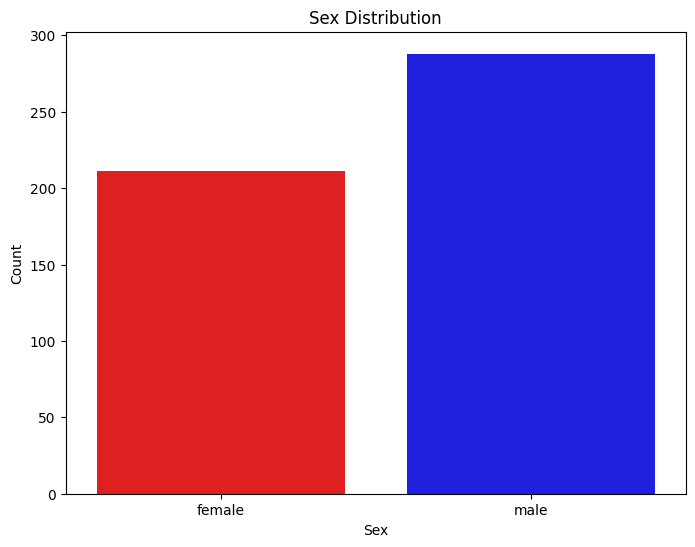

In [43]:
# visualize Sex distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=df, palette=['red', 'blue'])
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


## Age Distribution

In [44]:
# showing the number of each age
df['age'].value_counts()

,count
age,
35,63
24,23
30,20
36,19
18,14
45,14
42,14
28,13
22,12


Due to many unique age on data, i will categorize the age in to age groups, as follows:

1. Infants and Toddlers: < 5 years
2. Children: 5-9 years
3. Teenagers: 10-19 years
4. Adults: 20-59 years
5. Elderly: > 60 years

In [45]:
# categorizing age into age groups
def age_category(age):
    if age < 5:
        return 'Infants and Toddlers'
    elif 5 <= age <= 9:
        return 'Children'
    elif 10 <= age <= 19:
        return 'Teenagers'
    elif 20 <= age <= 59:
        return 'Adults'
    else:
        return 'Elderly'

df['age_group'] = df['age'].apply(age_category)
df[['age','age_group']].head()

,age,age_group
0,29,Adults
1,1,Infants and Toddlers
2,2,Infants and Toddlers
3,30,Adults
4,25,Adults


In [46]:
df['age_group'].value_counts()

,count
age_group,
Adults,413
Teenagers,39
Elderly,31
Infants and Toddlers,10
Children,6


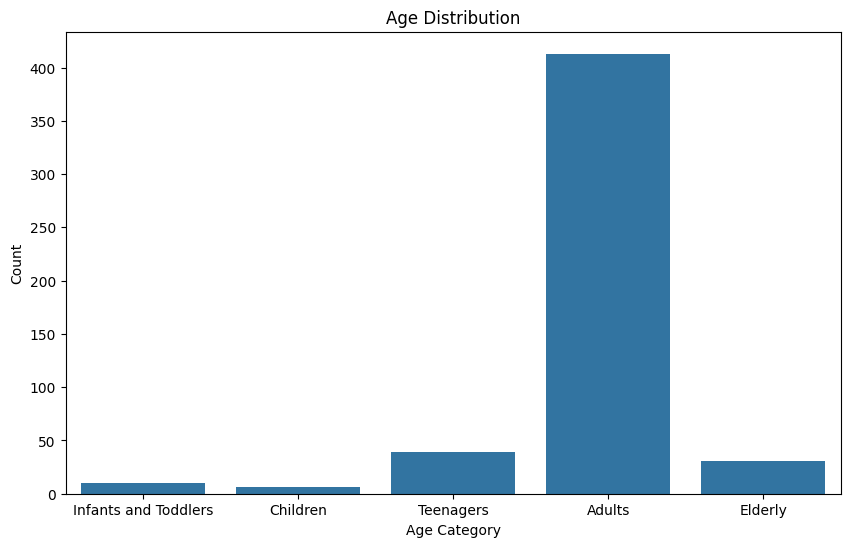

In [47]:
# visualize distribution
plt.figure(figsize=(10, 6))
order = ['Infants and Toddlers', 'Children', 'Teenagers', 'Adults', 'Elderly']
sns.countplot(data=df, x='age_group', order=order)
plt.title('Age Distribution')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()


## Age Category Distribution by Sex

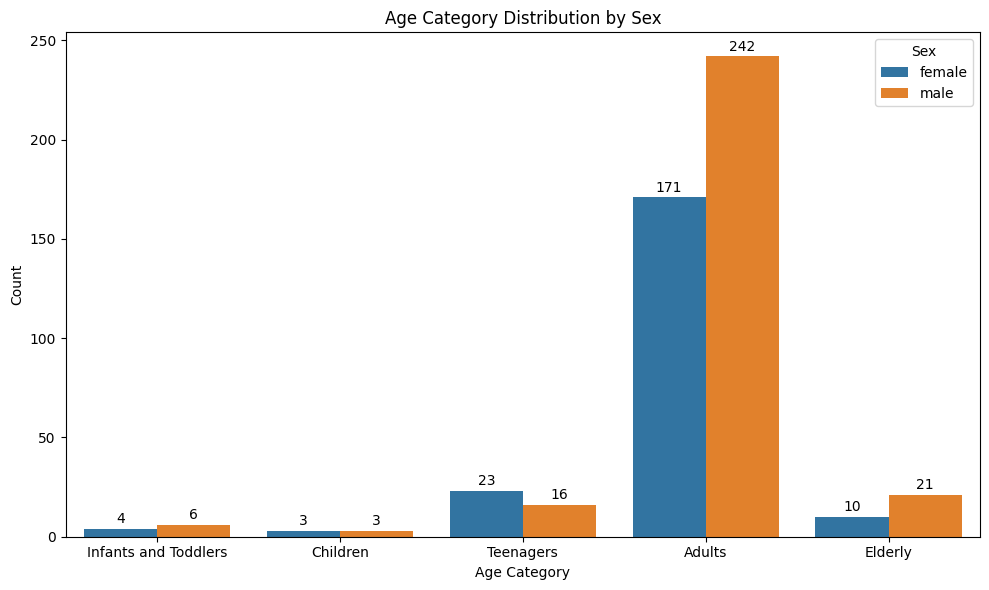

In [48]:
order = ['Infants and Toddlers', 'Children', 'Teenagers', 'Adults', 'Elderly']
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='age_group', hue='sex', order=order)
plt.title('Age Category Distribution by Sex')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(title='Sex')

# Menambahkan label jumlah di atas bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2)

plt.tight_layout()
plt.show()

## Survival Rate

In [49]:
# calculate the total number of survivors and non-survivors
survival_counts = df['survived'].value_counts()
survival_counts

,count
survived,
1,269
0,230


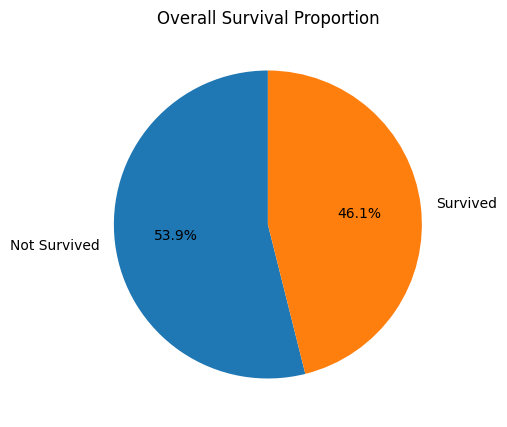

In [50]:
# visualize
plt.figure(figsize=(5,5))
plt.pie(survival_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90)
plt.title('Overall Survival Proportion')
plt.show()

In [51]:
survival_count_by_sex = df.groupby(['sex', 'survived']).size().reset_index(name='count')
survival_count_by_sex

,sex,survived,count
0,female,0,15
1,female,1,196
2,male,0,215
3,male,1,73


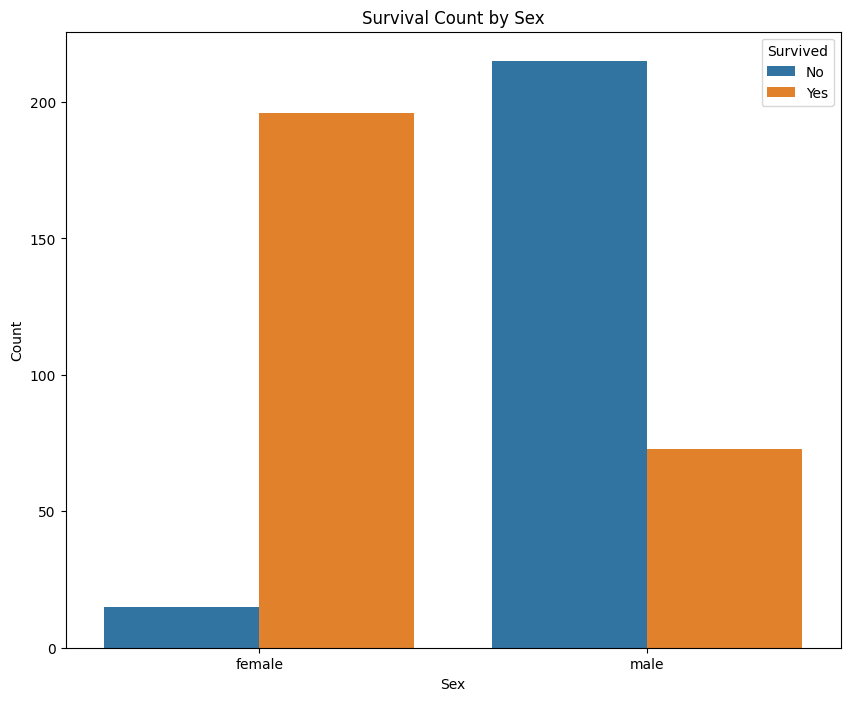

In [52]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='sex', hue='survived')
plt.title('Survival Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])  # 0 = not survived, 1 = survived
plt.show()

## Age and Sex vs Survived

In [53]:
# encode sex category into numeric
df['sex_encoded'] = df['sex_numeric'] = df['sex'].map({'male': 0, 'female': 1})
df[['sex', 'sex_encoded']]

,sex,sex_encoded
0,female,1
1,male,0
2,female,1
3,male,0
4,female,1
5,male,0
6,female,1
7,male,0
8,female,1
9,male,0


In [54]:
# calculate the corelation matrix
correlation = df[['age', 'sex_encoded', 'survived']].corr()
correlation

,age,sex_encoded,survived
age,1.000000,-0.090120,-0.139254
sex_encoded,-0.090120,1.000000,0.669395
survived,-0.139254,0.669395,1.000000


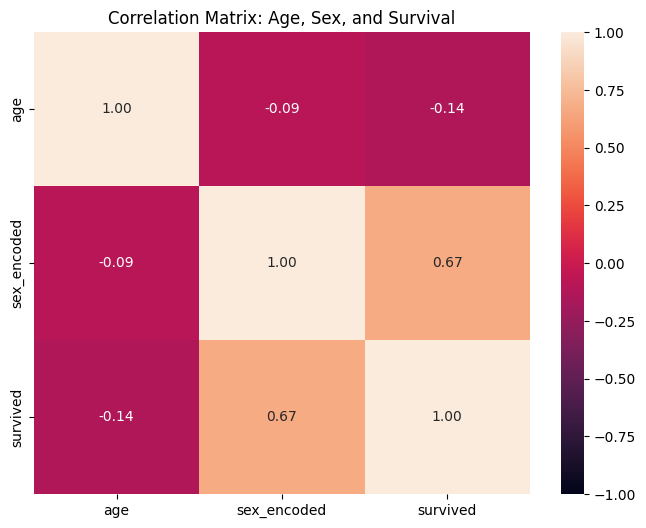

In [63]:
# visualize the correlation matrix using heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix: Age, Sex, and Survival')
plt.show()

## Age Distribution based on Survived

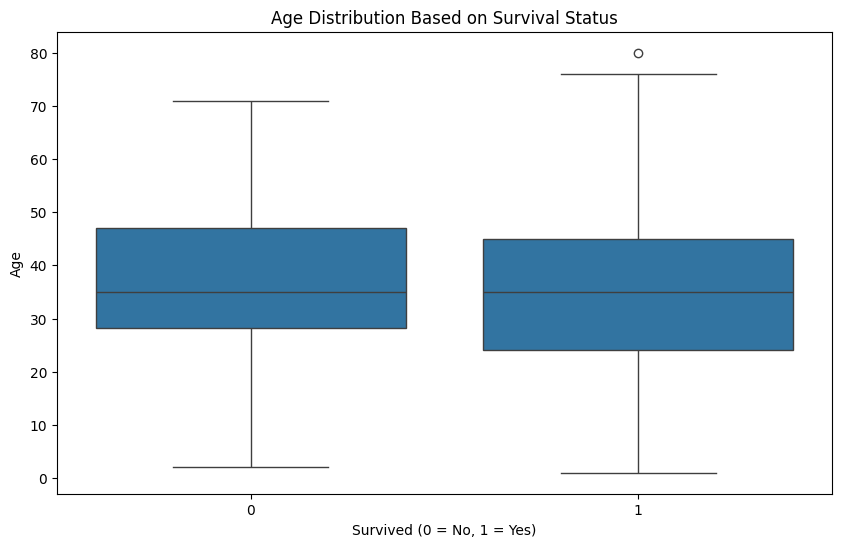

In [61]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='survived', y='age')
plt.title('Age Distribution Based on Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()